# Context of the Flight Data Set for Price Analysis.


The flight data set contains information about flights such as the source, destination, airline, duration, total stops, additional information, day, and month. The goal of analyzing this data set is to find patterns and insights that can help predict the price of a flight. By examining the relationships between the different features and the price, we can gain a better understanding of what factors contribute to the price of a flight. This information can be used by airlines, travel agencies, and customers to make informed decisions about flight prices and bookings.

# IMPORTING LIBRARIES AND DATASET

In [1]:
import pandas as pd 
flight = pd.read_excel("flight_data.xlsx")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np

In [4]:
flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
flight[flight['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
flight.duplicated().sum()

220

In [8]:
flight.drop_duplicates(inplace=True)
flight.dropna(inplace=True)

In [9]:
flight.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [10]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


# EDA(EXPLORATORY DATA ANALYSIS)

In [11]:
flight['day','month','year']=flight['Date_of_Journey'].str.split('/',regex=True)

In [12]:
split = flight['Date_of_Journey'].str.split('/', expand=True)
flight[['day', 'month', 'year']] = split

In [13]:
flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,"(day, month, year)",day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,"[24, 03, 2019]",24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,"[1, 05, 2019]",1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,"[9, 06, 2019]",9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,"[12, 05, 2019]",12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,"[01, 03, 2019]",01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,"[9, 04, 2019]",9,04,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,"[27, 04, 2019]",27,04,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,"[27, 04, 2019]",27,04,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,"[01, 03, 2019]",01,03,2019


In [14]:
flight.drop([('day','month','year'),'year','Date_of_Journey'],axis=1,inplace=True)

In [15]:
flight

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03


In [16]:
splitAT = flight['Arrival_Time'].str.split(' ',expand=True)

In [17]:
flight['Arrival_Time']=splitAT[0]

In [18]:
flight['Duration']= pd.to_timedelta(flight['Duration'])

In [19]:
flight

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,0 days 02:50:00,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,0 days 07:25:00,2 stops,No info,7662,1,05
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,0 days 19:00:00,2 stops,No info,13882,9,06
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,0 days 05:25:00,1 stop,No info,6218,12,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,0 days 04:45:00,1 stop,No info,13302,01,03
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,0 days 02:30:00,non-stop,No info,4107,9,04
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,0 days 02:35:00,non-stop,No info,4145,27,04
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,0 days 03:00:00,non-stop,No info,7229,27,04
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,0 days 02:40:00,non-stop,No info,12648,01,03


In [20]:
flight['Duration']=pd.to_timedelta(flight['Duration'].dt.total_seconds()/60)

In [21]:
flight['Duration']=flight['Duration'].dt.total_seconds()

In [22]:
flight['Duration']=flight['Duration']*1000000000

In [23]:
flight

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,170.0,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445.0,2 stops,No info,7662,1,05
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,1140.0,2 stops,No info,13882,9,06
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325.0,1 stop,No info,6218,12,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285.0,1 stop,No info,13302,01,03
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,150.0,non-stop,No info,4107,9,04
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,155.0,non-stop,No info,4145,27,04
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,180.0,non-stop,No info,7229,27,04
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,160.0,non-stop,No info,12648,01,03


In [24]:
flight.nunique()

Airline              12
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time        223
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
day                  14
month                 4
dtype: int64

In [25]:
flight.describe()

,Duration,Price
count,10462.000000,10462.000000
mean,629.781591,9026.790289
std,500.699045,4624.849541
min,5.000000,1759.000000
25%,170.000000,5224.000000
50%,505.000000,8266.000000
75%,910.000000,12344.750000
max,2860.000000,79512.000000


In [26]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10462 non-null  object 
 1   Source           10462 non-null  object 
 2   Destination      10462 non-null  object 
 3   Route            10462 non-null  object 
 4   Dep_Time         10462 non-null  object 
 5   Arrival_Time     10462 non-null  object 
 6   Duration         10462 non-null  float64
 7   Total_Stops      10462 non-null  object 
 8   Additional_Info  10462 non-null  object 
 9   Price            10462 non-null  int64  
 10  day              10462 non-null  object 
 11  month            10462 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.0+ MB


In [27]:
print(list(flight))

['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'day', 'month']


In [28]:
flight=flight.reindex(columns=[ 'Route','Dep_Time', 'Arrival_Time','Source', 'Destination', 'Airline', 'Duration', 'Total_Stops', 'Additional_Info', 'day', 'month', 'Price'])

In [29]:
flight

,Route,Dep_Time,Arrival_Time,Source,Destination,Airline,Duration,Total_Stops,Additional_Info,day,month,Price
0,BLR → DEL,22:20,01:10,Banglore,New Delhi,IndiGo,170.0,non-stop,No info,24,03,3897
1,CCU → IXR → BBI → BLR,05:50,13:15,Kolkata,Banglore,Air India,445.0,2 stops,No info,1,05,7662
2,DEL → LKO → BOM → COK,09:25,04:25,Delhi,Cochin,Jet Airways,1140.0,2 stops,No info,9,06,13882
3,CCU → NAG → BLR,18:05,23:30,Kolkata,Banglore,IndiGo,325.0,1 stop,No info,12,05,6218
4,BLR → NAG → DEL,16:50,21:35,Banglore,New Delhi,IndiGo,285.0,1 stop,No info,01,03,13302
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,19:55,22:25,Kolkata,Banglore,Air Asia,150.0,non-stop,No info,9,04,4107
10679,CCU → BLR,20:45,23:20,Kolkata,Banglore,Air India,155.0,non-stop,No info,27,04,4145
10680,BLR → DEL,08:20,11:20,Banglore,Delhi,Jet Airways,180.0,non-stop,No info,27,04,7229
10681,BLR → DEL,11:30,14:10,Banglore,New Delhi,Vistara,160.0,non-stop,No info,01,03,12648


In [30]:
flight['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [31]:
flight

,Route,Dep_Time,Arrival_Time,Source,Destination,Airline,Duration,Total_Stops,Additional_Info,day,month,Price
0,BLR → DEL,22:20,01:10,Banglore,New Delhi,IndiGo,170.0,non-stop,No info,24,03,3897
1,CCU → IXR → BBI → BLR,05:50,13:15,Kolkata,Banglore,Air India,445.0,2 stops,No info,1,05,7662
2,DEL → LKO → BOM → COK,09:25,04:25,Delhi,Cochin,Jet Airways,1140.0,2 stops,No info,9,06,13882
3,CCU → NAG → BLR,18:05,23:30,Kolkata,Banglore,IndiGo,325.0,1 stop,No info,12,05,6218
4,BLR → NAG → DEL,16:50,21:35,Banglore,New Delhi,IndiGo,285.0,1 stop,No info,01,03,13302
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,19:55,22:25,Kolkata,Banglore,Air Asia,150.0,non-stop,No info,9,04,4107
10679,CCU → BLR,20:45,23:20,Kolkata,Banglore,Air India,155.0,non-stop,No info,27,04,4145
10680,BLR → DEL,08:20,11:20,Banglore,Delhi,Jet Airways,180.0,non-stop,No info,27,04,7229
10681,BLR → DEL,11:30,14:10,Banglore,New Delhi,Vistara,160.0,non-stop,No info,01,03,12648


<AxesSubplot:xlabel='Price', ylabel='Additional_Info'>

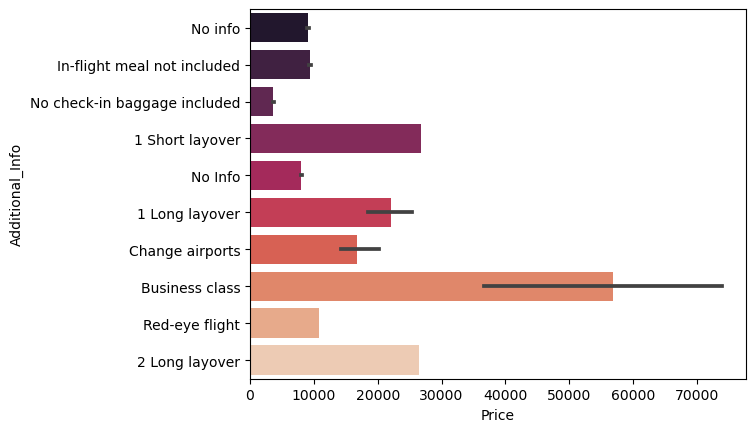

In [32]:
sns.barplot(x='Price',y='Additional_Info',data=flight,palette='rocket')

inferences-

The bar plot of 'Additional_Info' vs 'Price' in the flight dataset shows that the price of the flight increases with an increase in priority.

Flights with 'No check-in baggage included' have the lowest price in the dataset.

Business flights have the highest price in the dataset.

These inferences provide insights into the pricing strategies of different flight categories and can aid in making informed decisions while booking flights.

<AxesSubplot:xlabel='count', ylabel='Additional_Info'>

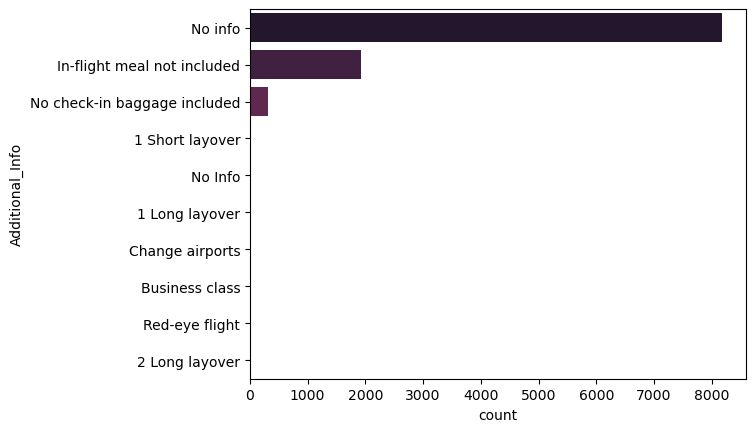

In [33]:
sns.countplot(y='Additional_Info',data=flight,palette='rocket')

inferences-

The barplot of Additional_Info shows that there is a large number of flights for which no additional information is available. This is followed by the category 'No Info'. The next most frequent category is 'In-flight meal not included', followed by 'No check-in baggage included'. The remaining categories have very low frequency and are not clearly visible on the graph.

In [34]:
flight

,Route,Dep_Time,Arrival_Time,Source,Destination,Airline,Duration,Total_Stops,Additional_Info,day,month,Price
0,BLR → DEL,22:20,01:10,Banglore,New Delhi,IndiGo,170.0,non-stop,No info,24,03,3897
1,CCU → IXR → BBI → BLR,05:50,13:15,Kolkata,Banglore,Air India,445.0,2 stops,No info,1,05,7662
2,DEL → LKO → BOM → COK,09:25,04:25,Delhi,Cochin,Jet Airways,1140.0,2 stops,No info,9,06,13882
3,CCU → NAG → BLR,18:05,23:30,Kolkata,Banglore,IndiGo,325.0,1 stop,No info,12,05,6218
4,BLR → NAG → DEL,16:50,21:35,Banglore,New Delhi,IndiGo,285.0,1 stop,No info,01,03,13302
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,19:55,22:25,Kolkata,Banglore,Air Asia,150.0,non-stop,No info,9,04,4107
10679,CCU → BLR,20:45,23:20,Kolkata,Banglore,Air India,155.0,non-stop,No info,27,04,4145
10680,BLR → DEL,08:20,11:20,Banglore,Delhi,Jet Airways,180.0,non-stop,No info,27,04,7229
10681,BLR → DEL,11:30,14:10,Banglore,New Delhi,Vistara,160.0,non-stop,No info,01,03,12648


In [35]:
f=pd.qcut(flight['Price'],5,labels=['0-4.8','4.8-7','7-10','10-13','13-79'])

In [36]:
f.unique()

['0-4.8', '7-10', '13-79', '4.8-7', '10-13']
Categories (5, object): ['0-4.8' < '4.8-7' < '7-10' < '10-13' < '13-79']

In [37]:
f.info()

<class 'pandas.core.series.Series'>
Int64Index: 10462 entries, 0 to 10682
Series name: Price
Non-Null Count  Dtype   
--------------  -----   
10462 non-null  category
dtypes: category(1)
memory usage: 92.2 KB


In [38]:
f=f.astype('category').cat.codes

I have binned the continuous numerical values of the 'Price' column using qcut into 5 discrete categories, and labeled them as ['0-4.8','4.8-7','7-10','10-13','13-79']. You have then converted these labels into numerical codes using the .astype('category').cat.codes method. This enables you to treat the 'Price' column as a categorical variable instead of a continuous one, which can be useful for certain types of analysis and modeling.

<AxesSubplot:ylabel='day'>

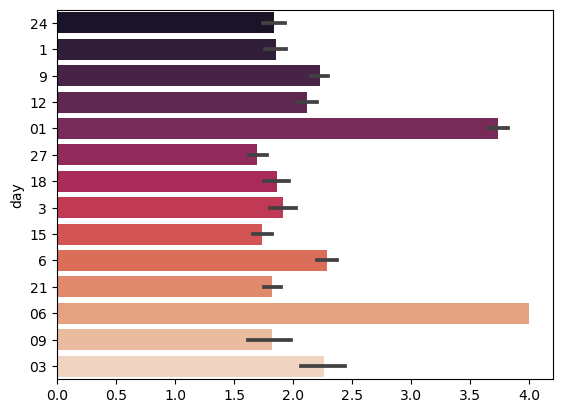

In [39]:
sns.barplot(x=f,y=flight['day'],palette='rocket')

inferences-

The bar plot shows the relationship between flight price and day of the week. The longest bars are for the first and sixth days, indicating that flight prices are generally higher on those days. The remaining days have shorter bars, suggesting that flight prices are generally lower on those days compared to the first and sixth days. However, further analysis may be required to determine if there are any other factors that are driving the price differences between the days.

In [40]:
f.unique()

array([0, 2, 4, 1, 3], dtype=int8)

In [41]:
flight['price']=f
#[0-(1758.999, 4804.0) ,1 -  (4804.0, 7064.0) , 2-(7064.0, 10031.0) ,3- (10031.0, 13029.0) ,4-(13029.0, 79512.0]]

Here, flight['price']=f is assigning the price ranges obtained from qcut and labeling them as f. The price ranges and their corresponding labels are:

0: (0, 1758.999)


1: (1758.999, 4804.0)


2: (4804.0, 7064.0)


3: (7064.0, 10031.0)


4: (10031.0, 13029.0)


5: (13029.0, 79512.0)


This step is useful for grouping the price values into distinct categories, which can help in the analysis of relationships between price and other variables in the dataset.

In [42]:
flight

,Route,Dep_Time,Arrival_Time,Source,Destination,Airline,Duration,Total_Stops,Additional_Info,day,month,Price,price
0,BLR → DEL,22:20,01:10,Banglore,New Delhi,IndiGo,170.0,non-stop,No info,24,03,3897,0
1,CCU → IXR → BBI → BLR,05:50,13:15,Kolkata,Banglore,Air India,445.0,2 stops,No info,1,05,7662,2
2,DEL → LKO → BOM → COK,09:25,04:25,Delhi,Cochin,Jet Airways,1140.0,2 stops,No info,9,06,13882,4
3,CCU → NAG → BLR,18:05,23:30,Kolkata,Banglore,IndiGo,325.0,1 stop,No info,12,05,6218,1
4,BLR → NAG → DEL,16:50,21:35,Banglore,New Delhi,IndiGo,285.0,1 stop,No info,01,03,13302,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,19:55,22:25,Kolkata,Banglore,Air Asia,150.0,non-stop,No info,9,04,4107,0
10679,CCU → BLR,20:45,23:20,Kolkata,Banglore,Air India,155.0,non-stop,No info,27,04,4145,0
10680,BLR → DEL,08:20,11:20,Banglore,Delhi,Jet Airways,180.0,non-stop,No info,27,04,7229,2
10681,BLR → DEL,11:30,14:10,Banglore,New Delhi,Vistara,160.0,non-stop,No info,01,03,12648,3


<AxesSubplot:xlabel='price', ylabel='Additional_Info'>

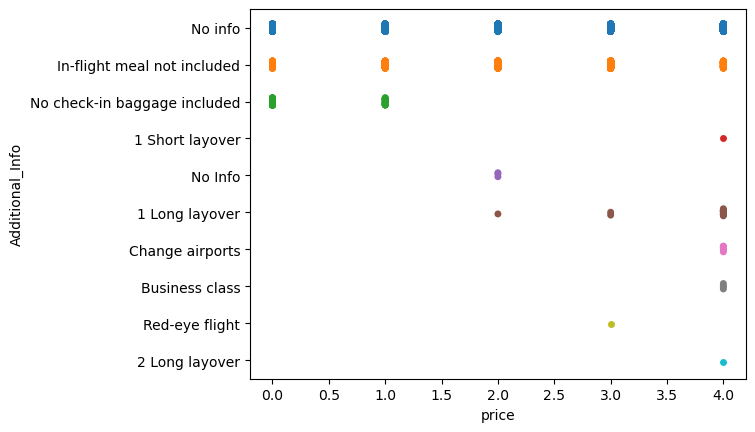

In [43]:
sns.stripplot(x='price',y='Additional_Info',data=flight, jitter=True)

inferences-

The strip plot for flight data shows that the majority of flights with 'No Info' or 'In-flight meal not included' have lower price categories. The higher price categories are dominated by flights with additional services such as 'Business class', '1 Long layover', and '2 Long layover'. However, it is difficult to distinguish between the remaining additional info categories as they are spread out across all price categories.

<AxesSubplot:xlabel='Price', ylabel='Airline'>

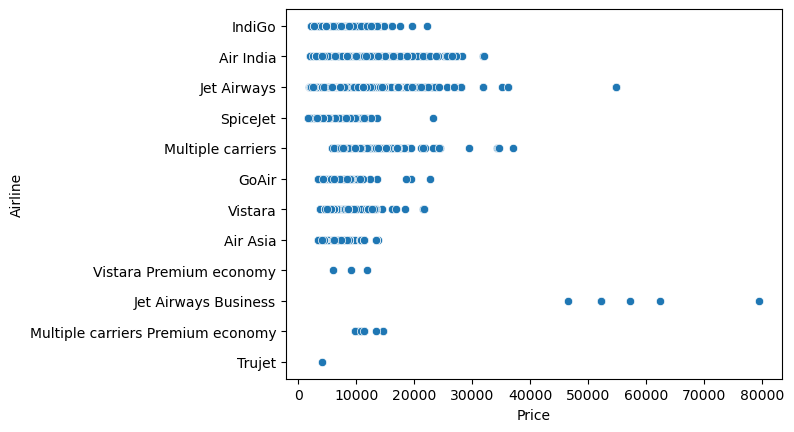

In [44]:
sns.scatterplot(x='Price',y='Airline',data=flight,palette='rocket')

inferences-

In the scatterplot, it can be observed that the prices for all airlines are generally under 30000. However, for the Jet Airways Business airline, there are four scattered points with prices ranging from 50000 to 80000. This indicates that Jet Airways Business has comparatively higher prices than other airlines for certain flights.

(0.0, 15000.0)

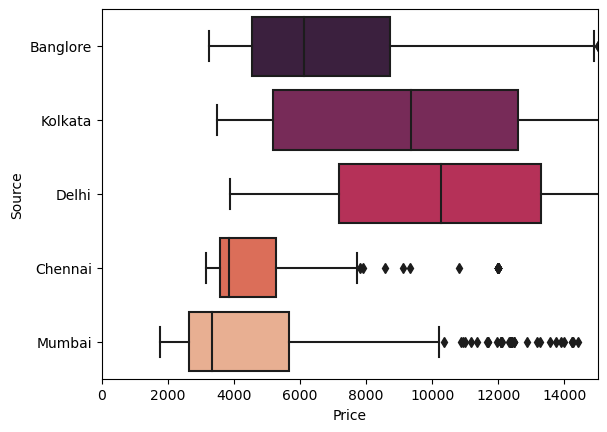

In [45]:
sns.boxplot(x='Price',y='Source',data=flight,palette='rocket')
plt.xlim(0,15000)

inferences-

The boxplot shows that flights from Delhi have the highest median price, followed by flights from Kolkata and Bangalore. Flights from Chennai and Mumbai have lower median prices. There is also more variability in the prices of flights from Delhi and Kolkata compared to the other cities.

<AxesSubplot:xlabel='Price', ylabel='Destination'>

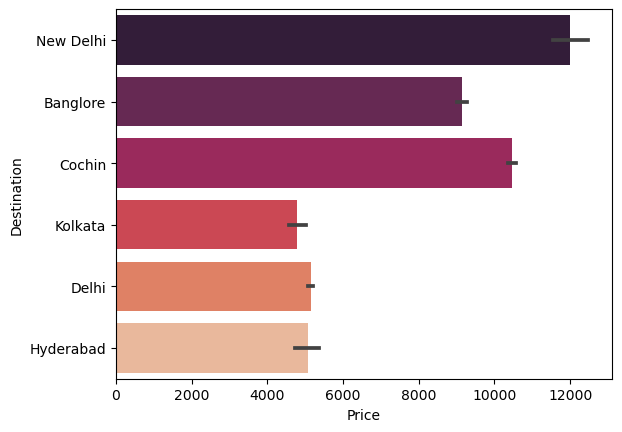

In [46]:
sns.barplot(x='Price',y='Destination',data=flight,palette='rocket')

inferences-

 The median price is higher for Delhi and Cochin, while it is lower for Kolkata. The interquartile range (IQR) for prices is wider for Delhi and Cochin, indicating that the prices for these destinations are more variable. The boxplot also shows the presence of some outliers, particularly for the destination Hyderabad. Overall, the boxplot provides a visual representation of the distribution of prices for different destinations.

<AxesSubplot:xlabel='price', ylabel='Total_Stops'>

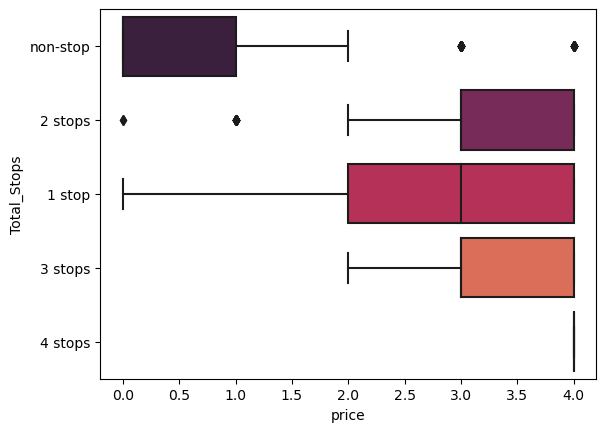

In [47]:
sns.boxplot(x='price',y='Total_Stops',data=flight,palette='rocket')

inferences-

The boxplot shows that the median price is higher for flights with more stops. Specifically, flights with 2 stops have the highest median price, followed by flights with 1 stop, then non-stop flights. Additionally, the boxplot shows that there is a wider spread of prices for flights with more stops, indicating that there is more price variability for these flights.

<AxesSubplot:xlabel='price', ylabel='day'>

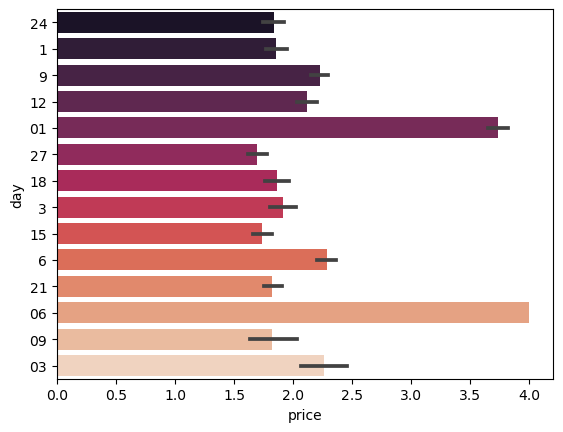

In [48]:
sns.barplot(x='price',y='day',data=flight,palette='rocket')

<AxesSubplot:xlabel='Price', ylabel='day'>

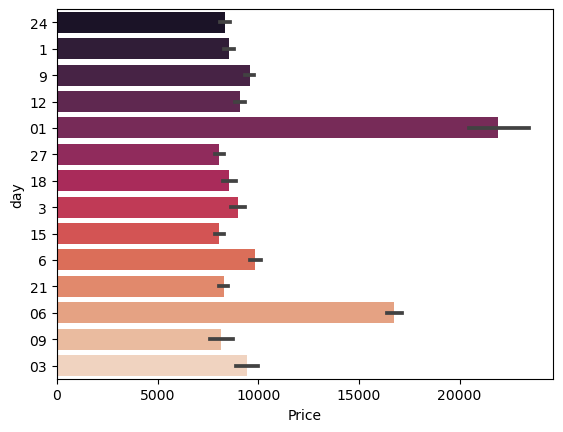

In [49]:
sns.barplot(x=flight['Price'],y=flight['day'],palette='rocket')

In [50]:
flight

,Route,Dep_Time,Arrival_Time,Source,Destination,Airline,Duration,Total_Stops,Additional_Info,day,month,Price,price
0,BLR → DEL,22:20,01:10,Banglore,New Delhi,IndiGo,170.0,non-stop,No info,24,03,3897,0
1,CCU → IXR → BBI → BLR,05:50,13:15,Kolkata,Banglore,Air India,445.0,2 stops,No info,1,05,7662,2
2,DEL → LKO → BOM → COK,09:25,04:25,Delhi,Cochin,Jet Airways,1140.0,2 stops,No info,9,06,13882,4
3,CCU → NAG → BLR,18:05,23:30,Kolkata,Banglore,IndiGo,325.0,1 stop,No info,12,05,6218,1
4,BLR → NAG → DEL,16:50,21:35,Banglore,New Delhi,IndiGo,285.0,1 stop,No info,01,03,13302,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,19:55,22:25,Kolkata,Banglore,Air Asia,150.0,non-stop,No info,9,04,4107,0
10679,CCU → BLR,20:45,23:20,Kolkata,Banglore,Air India,155.0,non-stop,No info,27,04,4145,0
10680,BLR → DEL,08:20,11:20,Banglore,Delhi,Jet Airways,180.0,non-stop,No info,27,04,7229,2
10681,BLR → DEL,11:30,14:10,Banglore,New Delhi,Vistara,160.0,non-stop,No info,01,03,12648,3


In [51]:
flight

,Route,Dep_Time,Arrival_Time,Source,Destination,Airline,Duration,Total_Stops,Additional_Info,day,month,Price,price
0,BLR → DEL,22:20,01:10,Banglore,New Delhi,IndiGo,170.0,non-stop,No info,24,03,3897,0
1,CCU → IXR → BBI → BLR,05:50,13:15,Kolkata,Banglore,Air India,445.0,2 stops,No info,1,05,7662,2
2,DEL → LKO → BOM → COK,09:25,04:25,Delhi,Cochin,Jet Airways,1140.0,2 stops,No info,9,06,13882,4
3,CCU → NAG → BLR,18:05,23:30,Kolkata,Banglore,IndiGo,325.0,1 stop,No info,12,05,6218,1
4,BLR → NAG → DEL,16:50,21:35,Banglore,New Delhi,IndiGo,285.0,1 stop,No info,01,03,13302,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,19:55,22:25,Kolkata,Banglore,Air Asia,150.0,non-stop,No info,9,04,4107,0
10679,CCU → BLR,20:45,23:20,Kolkata,Banglore,Air India,155.0,non-stop,No info,27,04,4145,0
10680,BLR → DEL,08:20,11:20,Banglore,Delhi,Jet Airways,180.0,non-stop,No info,27,04,7229,2
10681,BLR → DEL,11:30,14:10,Banglore,New Delhi,Vistara,160.0,non-stop,No info,01,03,12648,3


In [52]:
f=pd.qcut(flight['Price'],5,labels=['0-6','6-9','9-15','15-24','24-27'])

In [53]:
f.info()

<class 'pandas.core.series.Series'>
Int64Index: 10462 entries, 0 to 10682
Series name: Price
Non-Null Count  Dtype   
--------------  -----   
10462 non-null  category
dtypes: category(1)
memory usage: 92.2 KB


In [54]:
f

0          0-6
1         9-15
2        24-27
3          6-9
4        24-27
         ...  
10678      0-6
10679      0-6
10680     9-15
10681    15-24
10682    15-24
Name: Price, Length: 10462, dtype: category
Categories (5, object): ['0-6' < '6-9' < '9-15' < '15-24' < '24-27']

In [55]:
f=f.astype('category').cat.codes

<AxesSubplot:ylabel='day'>

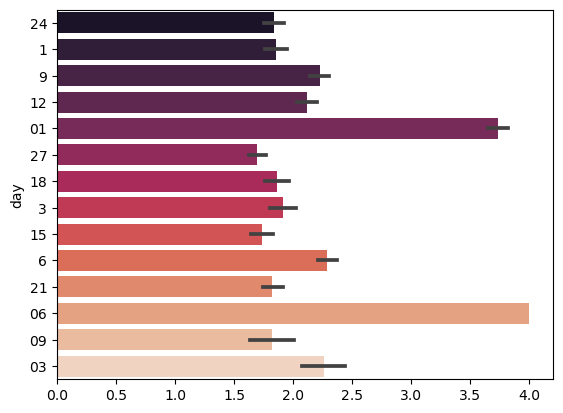

In [56]:
sns.barplot(x=f,y=flight['day'],palette='rocket')

In [57]:
f.unique()

array([0, 2, 4, 1, 3], dtype=int8)

In [58]:
flight['price']=f

In [59]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Route            10462 non-null  object 
 1   Dep_Time         10462 non-null  object 
 2   Arrival_Time     10462 non-null  object 
 3   Source           10462 non-null  object 
 4   Destination      10462 non-null  object 
 5   Airline          10462 non-null  object 
 6   Duration         10462 non-null  float64
 7   Total_Stops      10462 non-null  object 
 8   Additional_Info  10462 non-null  object 
 9   day              10462 non-null  object 
 10  month            10462 non-null  object 
 11  Price            10462 non-null  int64  
 12  price            10462 non-null  int8   
dtypes: float64(1), int64(1), int8(1), object(10)
memory usage: 1.0+ MB


In [60]:
flight

,Route,Dep_Time,Arrival_Time,Source,Destination,Airline,Duration,Total_Stops,Additional_Info,day,month,Price,price
0,BLR → DEL,22:20,01:10,Banglore,New Delhi,IndiGo,170.0,non-stop,No info,24,03,3897,0
1,CCU → IXR → BBI → BLR,05:50,13:15,Kolkata,Banglore,Air India,445.0,2 stops,No info,1,05,7662,2
2,DEL → LKO → BOM → COK,09:25,04:25,Delhi,Cochin,Jet Airways,1140.0,2 stops,No info,9,06,13882,4
3,CCU → NAG → BLR,18:05,23:30,Kolkata,Banglore,IndiGo,325.0,1 stop,No info,12,05,6218,1
4,BLR → NAG → DEL,16:50,21:35,Banglore,New Delhi,IndiGo,285.0,1 stop,No info,01,03,13302,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,19:55,22:25,Kolkata,Banglore,Air Asia,150.0,non-stop,No info,9,04,4107,0
10679,CCU → BLR,20:45,23:20,Kolkata,Banglore,Air India,155.0,non-stop,No info,27,04,4145,0
10680,BLR → DEL,08:20,11:20,Banglore,Delhi,Jet Airways,180.0,non-stop,No info,27,04,7229,2
10681,BLR → DEL,11:30,14:10,Banglore,New Delhi,Vistara,160.0,non-stop,No info,01,03,12648,3


<AxesSubplot:ylabel='Dep_Time'>

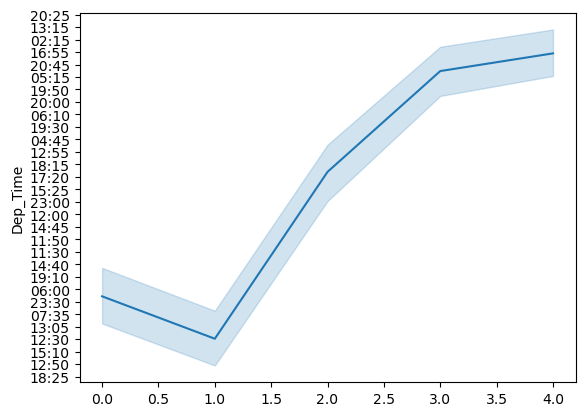

In [61]:
sns.lineplot(x=f,y=flight['Dep_Time'],palette='rocket')


inferences-

The lineplot suggests that there is no significant correlation between the departure time and the price of the flight ticket. The price of the flight ticket does not seem to be affected by the departure time.

<AxesSubplot:xlabel='price', ylabel='Arrival_Time'>

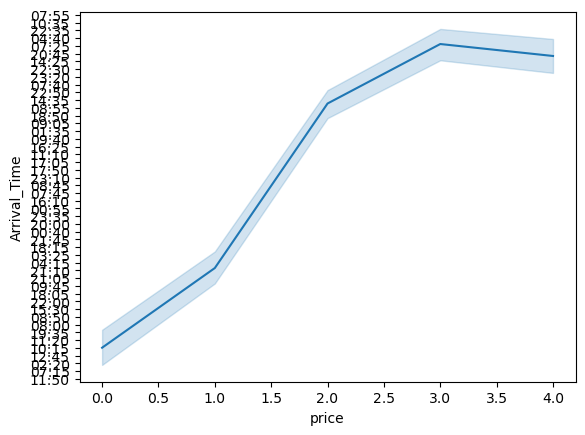

In [62]:
sns.lineplot(x='price',y='Arrival_Time',data=flight,palette='rocket')

inferences-


The line plot between 'Price' and 'Arrival_Time' does not show any significant correlation between the two columns. This suggests that the arrival time of the flight may not be a strong determinant of the ticket price, and other factors such as airline, destination, and total stops may have a greater impact on the price of the ticket.

<AxesSubplot:xlabel='price', ylabel='Duration'>

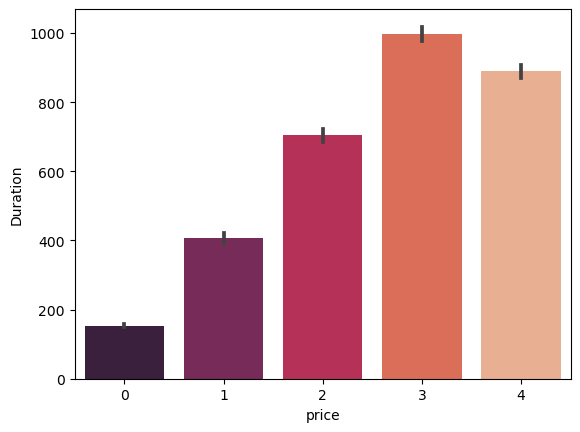

In [63]:
sns.barplot(x='price',y='Duration',data=flight,palette='rocket')

inferences-

The barplot of duration vs. labeled price, it appears that there is a positive relationship between the duration of the flight and the labeled price, with flights of longer duration tending to have higher labeled prices. However, as mentioned earlier, this relationship should be interpreted with caution and should be further explored using numerical values rather than labeled categories.

<AxesSubplot:xlabel='Price', ylabel='month'>

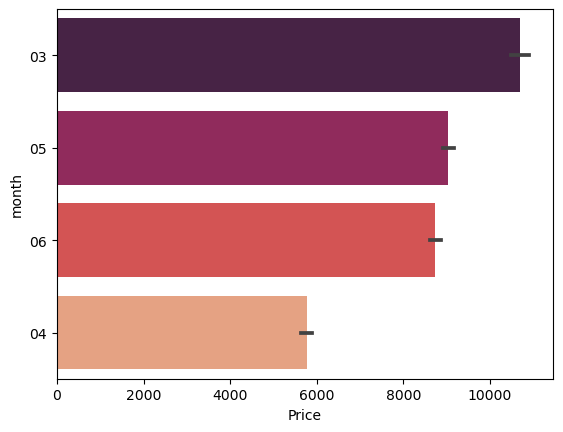

In [64]:
sns.barplot(x='Price',y='month',data=flight,palette='rocket')

inferences-

The bar plot of price against month shows that the highest prices are observed in the third month, followed by the fifth and sixth months, while the lowest prices are observed in the fourth month.

(0.0, 20000.0)

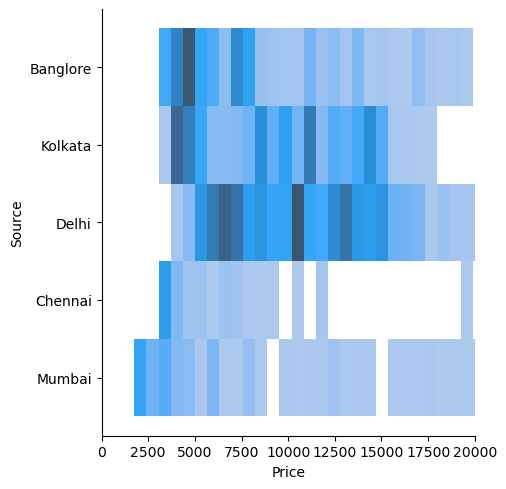

In [65]:
sns.displot(x='Price',y='Source',data=flight)
plt.xlim(0,20000)

inferences-

The plot you have mentioned is a distribution plot for the Price variable against the Source variable. When you limit the x-axis to 0-20000 using plt.xlim(0,20000), it restricts the plot to only show the Price values between 0-20000. This helps in better visualization of the distribution of Price values for each Source.

The plot shows that the distribution of Price values for different sources varies. The color of the plot indicates the density of Price values for each source. For example, Delhi has the highest density of Price values, followed by Kolkata, Bangalore, Chennai, and Mumbai in that order.

In [66]:
pvflight=flight.pivot_table(values='price',index='month',columns='day')

<AxesSubplot:xlabel='day', ylabel='month'>

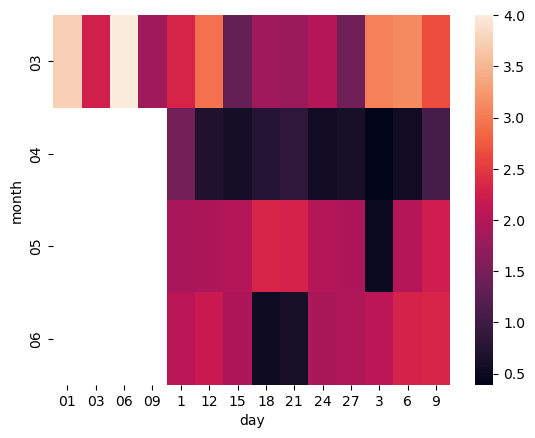

In [67]:
sns.heatmap(pvflight)

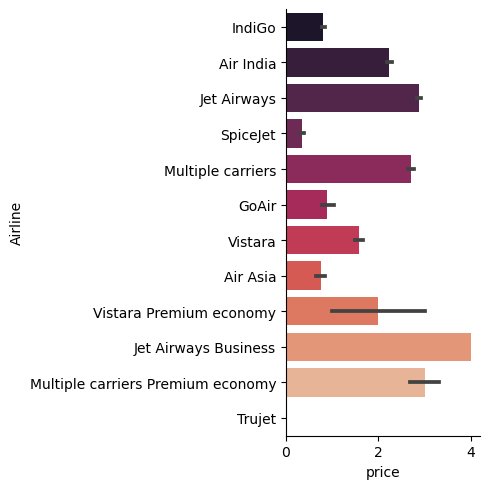

In [68]:
sns.factorplot(x='price',y='Airline',data=flight,kind='bar',palette='rocket')

inferences-


The factorplot shows that premium and business airlines have significantly higher prices compared to other airlines. The Jet Airways Business and Air India airlines have the longest bars in the plot, indicating their higher prices. It is also worth noting that the multiple carriers' premium economy class has a higher price compared to Jet Airways, which is a significant player in the Indian aviation market. Therefore, this information can be useful for customers who are looking to book premium and business class flights and want to compare prices across different airlines.


In [69]:
flight['Additional_Info']=flight['Additional_Info'].astype('category').cat.codes


#0-1long layover,1-1shortlayover,2-2Long layover,3-bussiness class,4-change ariport,5-in flight meal not inculede,6-no info,7-no cheak-in baggage inculded,8-no info,9-red eye flight

In [70]:
flight['Total_Stops']=flight['Total_Stops'].astype('category').cat.codes

In [71]:
flight['Total_Stops'].unique()

array([4, 1, 0, 2, 3], dtype=int8)

In [72]:
flight['Total_Stops']=flight['Total_Stops'].replace({4:0,0:1,1:2,2:3,3:4})
flight['Additional_Info']=flight['Additional_Info'].replace({8:6})

In [73]:
flight['Airline']=flight['Airline'].astype('category').cat.codes

In [74]:
flight[['Airline', 'Duration', 'Total_Stops', 'Additional_Info', 'day', 'month',]]=flight[['Airline', 'Duration', 'Total_Stops', 'Additional_Info', 'day', 'month',]].astype(int)

In [75]:
flight[['Airline', 'Duration', 'Total_Stops', 'Additional_Info', 'day', 'month',]]=flight[['Airline', 'Duration', 'Total_Stops', 'Additional_Info', 'day', 'month',]].astype(int)

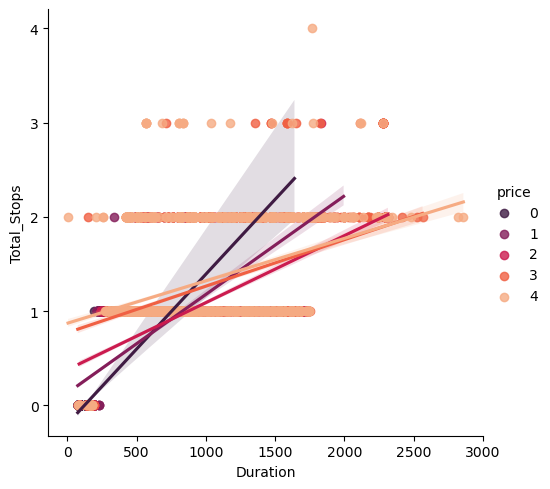

In [76]:
sns.lmplot(x='Duration',y='Total_Stops',data=flight,hue='price',palette='rocket')

inferences-


The lmplot shows a positive correlation between the duration of flights and the number of stops. As the number of stops increases, the regression line also increases in duration. The points on the plot are colored based on the categorical price column.

<AxesSubplot:xlabel='price', ylabel='Duration'>

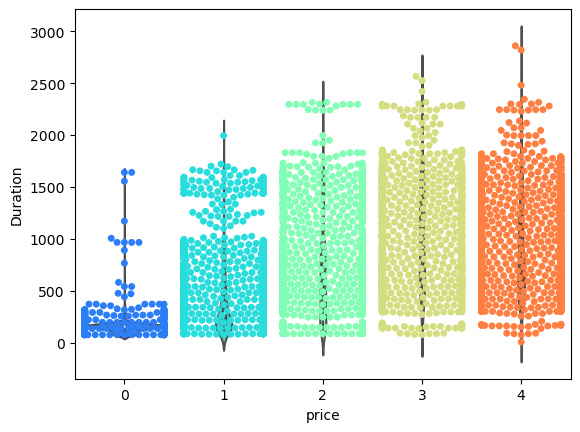

In [77]:
sns.violinplot(x="price",y="Duration", data=flight,palette='rainbow', size = 5)
sns.swarmplot(x="price",y="Duration", data=flight,palette='rainbow', size = 5)

inferences-

The violinplot in this code shows the distribution of flight durations for each price category (0-4). The wider sections of the violinplots indicate a higher density of flight durations for that price category. The swarmplot overlays individual flight durations as points on top of the violinplot, showing that as the duration of the flight increases, there are more flights with higher prices (labeled as 0, 1, 2, 3, and 4).

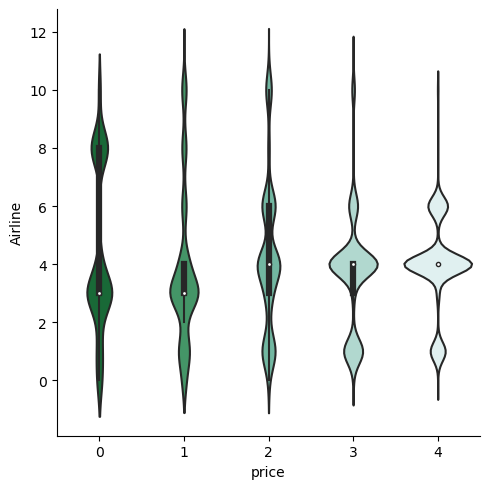

In [78]:
sns.factorplot(x='price',y='Airline',data=flight,kind='violin',palette='BuGn_r')

inferences-


4th airlines have significantly higher prices .

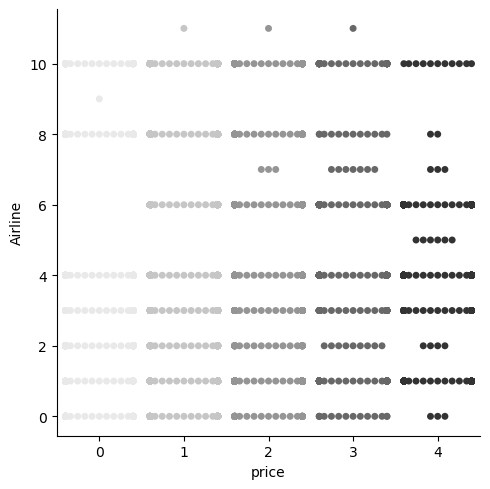

In [79]:
sns.factorplot(x='price',y='Airline',data=flight,kind='swarm',palette='Greys')

In [80]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Route            10462 non-null  object
 1   Dep_Time         10462 non-null  object
 2   Arrival_Time     10462 non-null  object
 3   Source           10462 non-null  object
 4   Destination      10462 non-null  object
 5   Airline          10462 non-null  int32 
 6   Duration         10462 non-null  int32 
 7   Total_Stops      10462 non-null  int32 
 8   Additional_Info  10462 non-null  int32 
 9   day              10462 non-null  int32 
 10  month            10462 non-null  int32 
 11  Price            10462 non-null  int64 
 12  price            10462 non-null  int8  
dtypes: int32(6), int64(1), int8(1), object(5)
memory usage: 1.1+ MB


In [81]:
flight['Additional_Info']=flight['Additional_Info'].astype('category').cat.codes


#0-1long layover,1-1shortlayover,2-2Long layover,3-bussiness class,4-change ariport,5-in flight meal not inculede,6-no info,7-no cheak-in baggage inculded,8-no info,9-red eye flight

In [82]:
flight['Total_Stops']=flight['Total_Stops'].astype('category').cat.codes

In [83]:
flight['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int8)

In [84]:
flight['Total_Stops']=flight['Total_Stops'].replace({4:0,0:1,1:2,2:3,3:4})
flight['Additional_Info']=flight['Additional_Info'].replace({8:6})

In [85]:
flight[['Airline', 'Duration', 'Total_Stops', 'Additional_Info', 'day', 'month',]]=flight[['Airline', 'Duration', 'Total_Stops', 'Additional_Info', 'day', 'month',]].astype(int)

In [86]:
flight[['Airline', 'Duration', 'Total_Stops', 'Additional_Info', 'day', 'month',]]=flight[['Airline', 'Duration', 'Total_Stops', 'Additional_Info', 'day', 'month',]].astype(int)

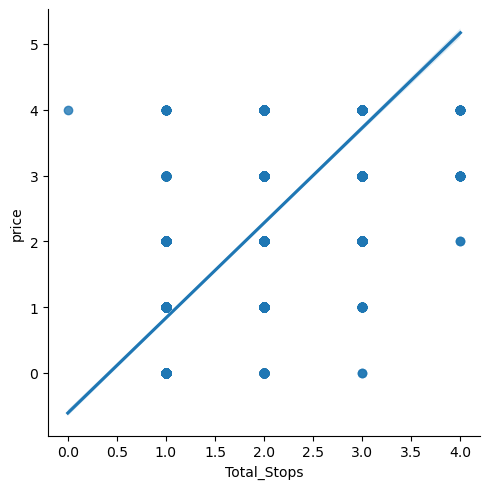

In [87]:
sns.lmplot(x='Total_Stops',y='price',data=flight)

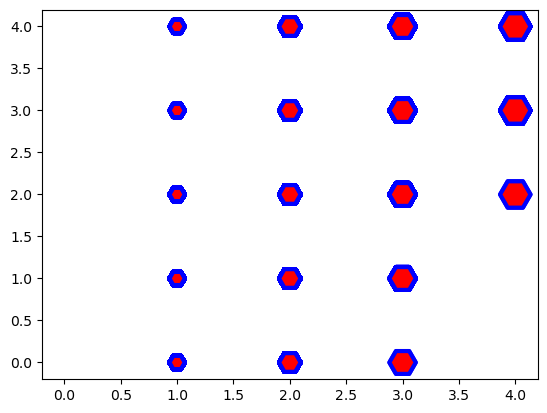

In [88]:
size=np.array(flight['Total_Stops']*120)
plt.scatter(x='Total_Stops',y='price',data=flight,s=size,color='red',linewidth=3,marker='H',edgecolor='blue')


<AxesSubplot:xlabel='price', ylabel='Duration'>

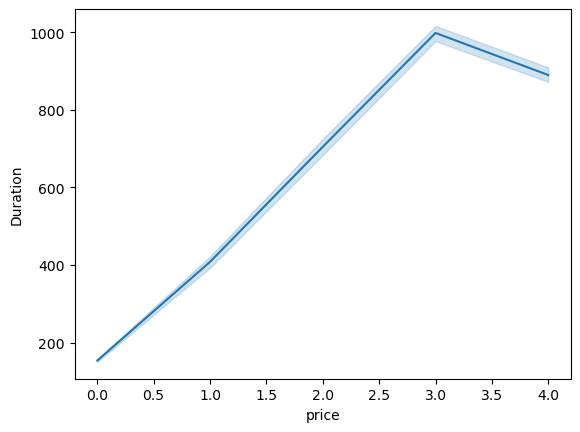

In [89]:
sns.lineplot(x="price",y="Duration", data=flight,palette='rainbow')

# conclusion-



From the analysis, it can be concluded that the columns 'Source', 'Destination', 'Airline', 'Duration', 'Total_Stops', 'Additional_Info', 'day', and 'month' have an impact on the price of airline tickets.

The 'Airline' column plays a significant role in determining the ticket price, with premium and business airlines having higher prices compared to others. Additionally, the 'Source' and 'Destination' columns also have an impact on the price, with Delhi being the most expensive destination, followed by Kolkata, Bangalore, Chennai, and Mumbai.

The 'Duration' and 'Total_Stops' columns are also important in predicting the price of airline tickets, with longer flight durations and more stops leading to higher ticket prices. Finally, the 'day' and 'month' columns may also play a role in determining ticket prices, with certain days or months potentially being more expensive for air travel.

In [90]:
flight

,Route,Dep_Time,Arrival_Time,Source,Destination,Airline,Duration,Total_Stops,Additional_Info,day,month,Price,price
0,BLR → DEL,22:20,01:10,Banglore,New Delhi,3,170,1,6,24,3,3897,0
1,CCU → IXR → BBI → BLR,05:50,13:15,Kolkata,Banglore,1,445,3,6,1,5,7662,2
2,DEL → LKO → BOM → COK,09:25,04:25,Delhi,Cochin,4,1140,3,6,9,6,13882,4
3,CCU → NAG → BLR,18:05,23:30,Kolkata,Banglore,3,325,2,6,12,5,6218,1
4,BLR → NAG → DEL,16:50,21:35,Banglore,New Delhi,3,285,2,6,1,3,13302,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,19:55,22:25,Kolkata,Banglore,0,150,1,6,9,4,4107,0
10679,CCU → BLR,20:45,23:20,Kolkata,Banglore,1,155,1,6,27,4,4145,0
10680,BLR → DEL,08:20,11:20,Banglore,Delhi,4,180,1,6,27,4,7229,2
10681,BLR → DEL,11:30,14:10,Banglore,New Delhi,10,160,1,6,1,3,12648,3


In [91]:
flight['Dep_Time']= pd.to_timedelta(flight['Dep_Time']+':00')

In [92]:
flight

,Route,Dep_Time,Arrival_Time,Source,Destination,Airline,Duration,Total_Stops,Additional_Info,day,month,Price,price
0,BLR → DEL,0 days 22:20:00,01:10,Banglore,New Delhi,3,170,1,6,24,3,3897,0
1,CCU → IXR → BBI → BLR,0 days 05:50:00,13:15,Kolkata,Banglore,1,445,3,6,1,5,7662,2
2,DEL → LKO → BOM → COK,0 days 09:25:00,04:25,Delhi,Cochin,4,1140,3,6,9,6,13882,4
3,CCU → NAG → BLR,0 days 18:05:00,23:30,Kolkata,Banglore,3,325,2,6,12,5,6218,1
4,BLR → NAG → DEL,0 days 16:50:00,21:35,Banglore,New Delhi,3,285,2,6,1,3,13302,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0 days 19:55:00,22:25,Kolkata,Banglore,0,150,1,6,9,4,4107,0
10679,CCU → BLR,0 days 20:45:00,23:20,Kolkata,Banglore,1,155,1,6,27,4,4145,0
10680,BLR → DEL,0 days 08:20:00,11:20,Banglore,Delhi,4,180,1,6,27,4,7229,2
10681,BLR → DEL,0 days 11:30:00,14:10,Banglore,New Delhi,10,160,1,6,1,3,12648,3


In [93]:
flight['Dep_Time']=pd.to_timedelta(flight['Dep_Time'].dt.total_seconds()/60)

In [94]:
#flight['Dep_Time']=flight['Dep_Time'].dt.total_seconds()

In [95]:
#flight['Dep_Time']=flight['Dep_Time']*1000000000

In [96]:
flight['Arrival_Time']= pd.to_timedelta(flight['Arrival_Time']+':00')

In [97]:
flight

,Route,Dep_Time,Arrival_Time,Source,Destination,Airline,Duration,Total_Stops,Additional_Info,day,month,Price,price
0,BLR → DEL,0 days 00:00:00.000001340,0 days 01:10:00,Banglore,New Delhi,3,170,1,6,24,3,3897,0
1,CCU → IXR → BBI → BLR,0 days 00:00:00.000000350,0 days 13:15:00,Kolkata,Banglore,1,445,3,6,1,5,7662,2
2,DEL → LKO → BOM → COK,0 days 00:00:00.000000565,0 days 04:25:00,Delhi,Cochin,4,1140,3,6,9,6,13882,4
3,CCU → NAG → BLR,0 days 00:00:00.000001085,0 days 23:30:00,Kolkata,Banglore,3,325,2,6,12,5,6218,1
4,BLR → NAG → DEL,0 days 00:00:00.000001010,0 days 21:35:00,Banglore,New Delhi,3,285,2,6,1,3,13302,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0 days 00:00:00.000001195,0 days 22:25:00,Kolkata,Banglore,0,150,1,6,9,4,4107,0
10679,CCU → BLR,0 days 00:00:00.000001245,0 days 23:20:00,Kolkata,Banglore,1,155,1,6,27,4,4145,0
10680,BLR → DEL,0 days 00:00:00.000000500,0 days 11:20:00,Banglore,Delhi,4,180,1,6,27,4,7229,2
10681,BLR → DEL,0 days 00:00:00.000000690,0 days 14:10:00,Banglore,New Delhi,10,160,1,6,1,3,12648,3


In [98]:
flight['Arrival_Time']=pd.to_timedelta(flight['Arrival_Time'].dt.total_seconds()/60)

In [99]:
#flight['Arrival_Time']=flight['Arrival_Time'].dt.total_seconds()

In [100]:
#flight['Arrival_Time']=flight['Arrival_Time']*1000000000

In [101]:
flight['Duration']=flight['Duration'].astype('category').cat.codes

In [102]:
flight['day']=flight['day'].astype('category').cat.codes

In [103]:
flight['Source']=flight['Source'].astype('category').cat.codes
flight['Destination']=flight['Destination'].astype('category').cat.codes

In [104]:
flight

,Route,Dep_Time,Arrival_Time,Source,Destination,Airline,Duration,Total_Stops,Additional_Info,day,month,Price,price
0,BLR → DEL,0 days 00:00:00.000001340,0 days 00:00:00.000000070,0,5,3,13,1,6,8,3,3897,0
1,CCU → IXR → BBI → BLR,0 days 00:00:00.000000350,0 days 00:00:00.000000795,3,0,1,65,3,6,0,5,7662,2
2,DEL → LKO → BOM → COK,0 days 00:00:00.000000565,0 days 00:00:00.000000265,2,1,4,202,3,6,3,6,13882,4
3,CCU → NAG → BLR,0 days 00:00:00.000001085,0 days 00:00:00.000001410,3,0,3,41,2,6,4,5,6218,1
4,BLR → NAG → DEL,0 days 00:00:00.000001010,0 days 00:00:00.000001295,0,5,3,33,2,6,0,3,13302,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0 days 00:00:00.000001195,0 days 00:00:00.000001345,3,0,0,9,1,6,3,4,4107,0
10679,CCU → BLR,0 days 00:00:00.000001245,0 days 00:00:00.000001400,3,0,1,10,1,6,9,4,4145,0
10680,BLR → DEL,0 days 00:00:00.000000500,0 days 00:00:00.000000680,0,2,4,15,1,6,9,4,7229,2
10681,BLR → DEL,0 days 00:00:00.000000690,0 days 00:00:00.000000850,0,5,10,11,1,6,0,3,12648,3


# MACHINE LEARNING MODELS

In [105]:
x=flight.iloc[:,3:-2]

In [106]:
y=flight['price']

In [107]:
x

,Source,Destination,Airline,Duration,Total_Stops,Additional_Info,day,month
0,0,5,3,13,1,6,8,3
1,3,0,1,65,3,6,0,5
2,2,1,4,202,3,6,3,6
3,3,0,3,41,2,6,4,5
4,0,5,3,33,2,6,0,3
...,...,...,...,...,...,...,...,...
10678,3,0,0,9,1,6,3,4
10679,3,0,1,10,1,6,9,4
10680,0,2,4,15,1,6,9,4
10681,0,5,10,11,1,6,0,3


x.plot(kind='bar',color=['red','blue','black','yellow','pink'])
plt.ylim(0,15)

In [108]:
from sklearn.preprocessing import StandardScaler
S = StandardScaler()
x=S.fit_transform(x)

In [109]:
x=pd.DataFrame(x)

In [110]:
x

,0,1,2,3,4,5,6,7
0,-1.646877,2.404213,-0.414916,-0.931351,-1.214798,0.328287,1.234108,-1.462080
1,0.882057,-0.972012,-1.260756,-0.386706,1.815174,0.328287,-1.550137,0.256507
2,0.039079,-0.296767,0.008004,1.048224,1.815174,0.328287,-0.506045,1.115800
3,0.882057,-0.972012,-0.414916,-0.638081,0.300188,0.328287,-0.158014,0.256507
4,-1.646877,2.404213,-0.414916,-0.721872,0.300188,0.328287,-1.550137,-1.462080
...,...,...,...,...,...,...,...,...
10457,0.882057,-0.972012,-1.683676,-0.973247,-1.214798,0.328287,-0.506045,-0.602787
10458,0.882057,-0.972012,-1.260756,-0.962773,-1.214798,0.328287,1.582139,-0.602787
10459,-1.646877,0.378478,0.008004,-0.910403,-1.214798,0.328287,1.582139,-0.602787
10460,-1.646877,2.404213,2.545524,-0.952299,-1.214798,0.328287,-1.550137,-1.462080


In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

from sklearn.linear_model import LinearRegression
model_l = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
model_kn = KNeighborsRegressor()
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
from sklearn.svm import SVR
model_sv = SVR()
from sklearn.linear_model import LogisticRegression
model_lr =LogisticRegression()
from sklearn.metrics import r2_score,mean_squared_error

model_l.fit(x_train,y_train)
pred_l= model_l.predict(x_test)
print("r2_score linear regression is:",r2_score(y_test,pred_l)*100)

#print('mean_squared_error linear regression is ',mean_squared_error(y_test,pred_l))

model_kn.fit(x_train,y_train)
pred_kn = model_kn.predict(x_test)
print("r2_score k neighbors regression is:",r2_score(y_test,pred_kn)*100)

#print('mean_squared_error k neighbors regression is ',mean_squared_error(y_test,pred_kn))

model_dt.fit(x_train,y_train)
pred_dt= model_dt.predict(x_test)
print("r2_score  decision tree regression is:",r2_score(y_test,pred_dt)*100)

#print('mean_squared_error decision tree regression is ',mean_squared_error(y_test,pred_dt))

model_rf.fit(x_train,y_train)
pred_rf= model_rf.predict(x_test)
print("r2_score Random tree regression is:",r2_score(y_test,pred_rf)*100)

#print('mean_squared_error Random tree regression is ',mean_squared_error(y_test,pred_rf))

model_sv.fit(x_train,y_train)
pred_sv= model_sv.predict(x_test)
print("r2_score SVR is:",r2_score(y_test,pred_sv)*100)
#print('mean_squared_error SVR is ', mean_squared_error(y_test,pred_sv))





r2_score linear regression is: 50.11934633403789
r2_score k neighbors regression is: 81.51089743998237
r2_score  decision tree regression is: 78.91433244090248
r2_score Random tree regression is: 85.88433276254884
r2_score SVR is: 72.9772825354952


## just for information

In [112]:
y=flight['price']

In [113]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
from sklearn.svm import SVC
model_sv = SVC()
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier()
from sklearn.metrics import accuracy_score,precision_score

model_lr.fit(xtrain,ytrain)
pred_lr=model_lr.predict(xtest)
print("accuracy_score",accuracy_score(ytest,pred_lr)*100)
print("precision_score LogisticRegression:",precision_score(ytest,pred_lr,average='micro'))

model_rf.fit(xtrain,ytrain)
pred_rf=model_rf.predict(xtest)
print("accuracy_score",accuracy_score(ytest,pred_rf)*100)
print("precision_score RandomForestClassifier:",precision_score(ytest,pred_rf,average='micro'))

model_dt.fit(xtrain,ytrain)
pred_dt=model_dt.predict(xtest)
print("accuracy_score",accuracy_score(ytest,pred_dt)*100)
print("precision_score DecisionTreeClassifier:",precision_score(ytest,pred_dt,average='micro'))

model_sv.fit(xtrain,ytrain)
pred_sv=model_sv.predict(xtest)
print("accuracy_score",accuracy_score(ytest,pred_sv)*100)
print("precision_score SVC",precision_score(ytest,pred_sv,average='micro'))

model_kn.fit(xtrain,ytrain)
pred_kn=model_kn.predict(xtest)
print("accuracy_score",accuracy_score(ytest,pred_kn)*100)
print("precision_score KNeighborsClassifier",precision_score(ytest,pred_kn,average='micro'))

accuracy_score 48.877209746774966
precision_score LogisticRegression: 0.48877209746774963
accuracy_score 72.00191113234592
precision_score RandomForestClassifier: 0.7200191113234592
accuracy_score 75.4897276636407
precision_score DecisionTreeClassifier: 0.754897276636407
accuracy_score 66.88963210702342
precision_score SVC 0.6688963210702341
accuracy_score 70.61634018155758
precision_score KNeighborsClassifier 0.7061634018155757


# Thanks